Trader columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment columns: ['timestamp', 'value', 'classification', 'date']


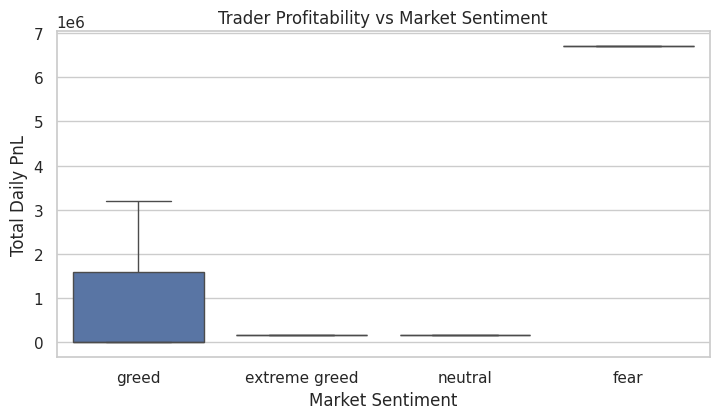

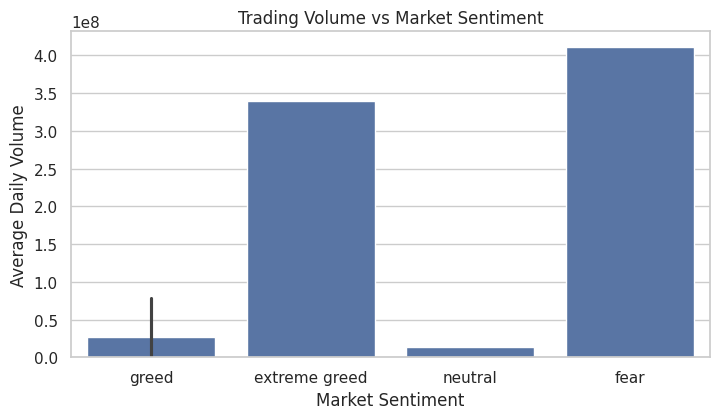

                     avg_pnl    median_pnl    avg_volume  avg_active_traders
Classification                                                              
extreme greed   1.769655e+05  1.769655e+05  3.393031e+08            5.000000
fear            6.699925e+06  6.699925e+06  4.111879e+08           32.000000
greed           1.063206e+06  1.555034e+02  2.700044e+07           10.666667
neutral         1.587424e+05  1.587424e+05  1.404851e+07            8.000000


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# Create required directories
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# ================= LOAD DATA =================
trades = pd.read_csv("/historical_data.csv")
sentiment = pd.read_csv("/fear_greed_index.csv")

print("Trader columns:", trades.columns.tolist())
print("Sentiment columns:", sentiment.columns.tolist())

# ================= TRADER DATA PROCESSING =================
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms', errors='coerce')
trades['date'] = trades['Timestamp'].dt.date

# ================= SENTIMENT DATA PROCESSING =================
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date
sentiment.rename(columns={'classification': 'Classification'}, inplace=True)
sentiment['Classification'] = sentiment['Classification'].str.lower()

# ================= FEATURE ENGINEERING =================
daily_trader_metrics = trades.groupby('date').agg(
    total_pnl=('Closed PnL', 'sum'),
    total_volume=('Size Tokens', 'sum'),
    active_traders=('Account', 'nunique')
).reset_index()

daily_trader_metrics.to_csv("csv_files/daily_trader_metrics.csv", index=False)

# ================= MERGE =================
merged_data = daily_trader_metrics.merge(
    sentiment[['date', 'Classification']],
    on='date',
    how='inner'
)

merged_data.to_csv("csv_files/merged_trader_sentiment.csv", index=False)

# ================= VISUALIZATIONS =================

plt.figure(figsize=(8, 5))
sns.boxplot(x='Classification', y='total_pnl', data=merged_data)
plt.title("Trader Profitability vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Daily PnL")
plt.tight_layout(pad=3)
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Classification',
    y='total_volume',
    data=merged_data,
    estimator=np.mean
)
plt.title("Trading Volume vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Daily Volume")
plt.tight_layout(pad=3)
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()

# ================= SUMMARY =================
summary = merged_data.groupby('Classification').agg(
    avg_pnl=('total_pnl', 'mean'),
    median_pnl=('total_pnl', 'median'),
    avg_volume=('total_volume', 'mean'),
    avg_active_traders=('active_traders', 'mean')
)

print(summary)


In [26]:
print(trades.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date']


In [27]:
print(sentiment.columns.tolist())


['timestamp', 'value', 'Classification', 'date']
